# Седов Николай ПМ22-7

# Методичка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8413
Test score: 0.8056


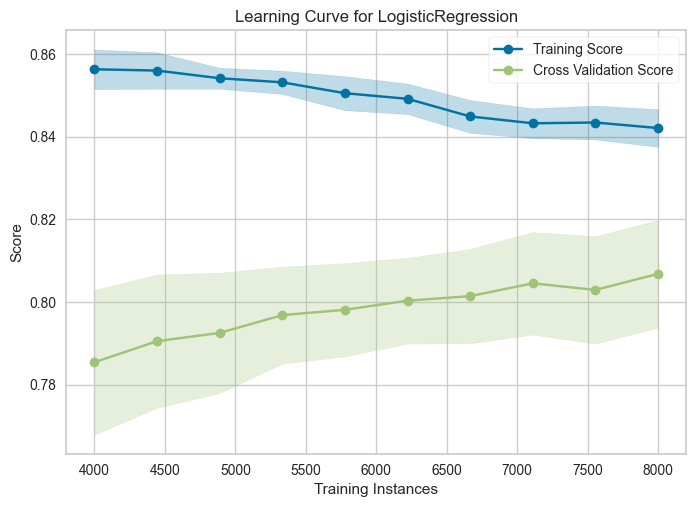

In [4]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

In [5]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


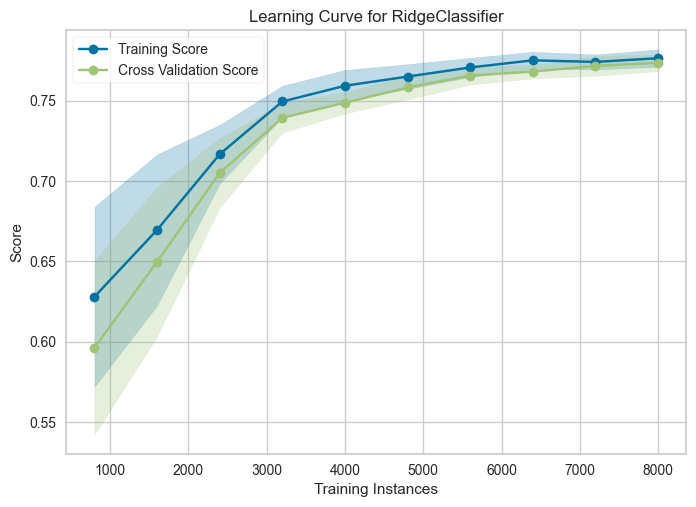

In [6]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

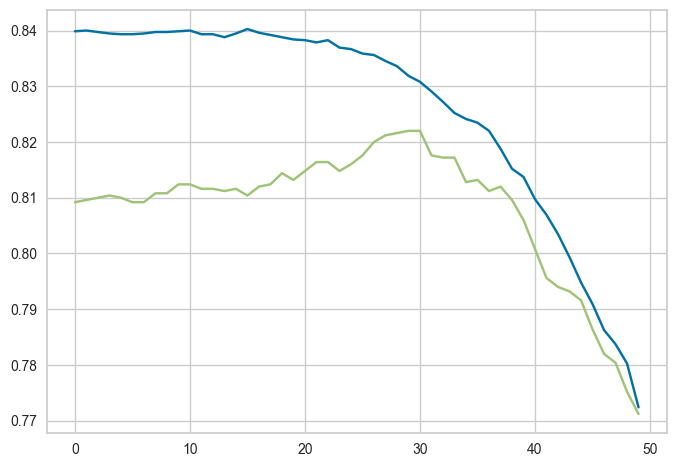

In [7]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [8]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


In [9]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

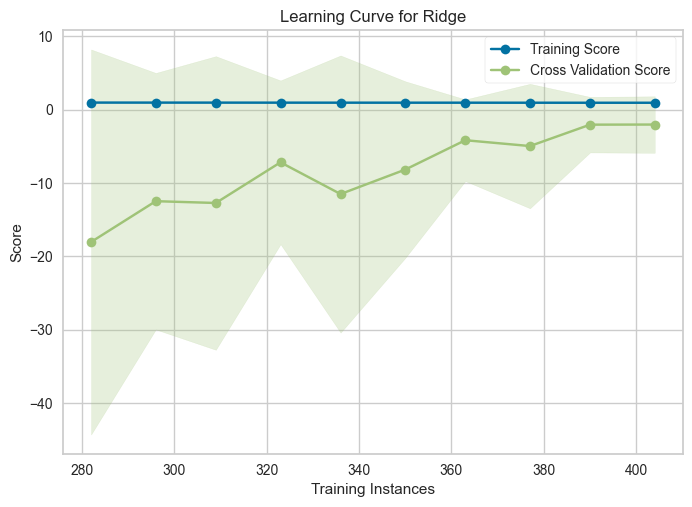

In [10]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import Ridge
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

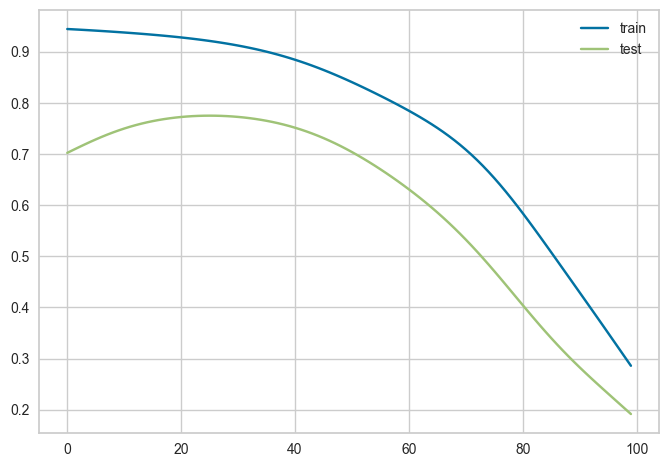

In [11]:
from sklearn.linear_model import Ridge
trains = []
tests = []

for i in np.logspace(-2, 3, 100):
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()
plt.show()

In [12]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


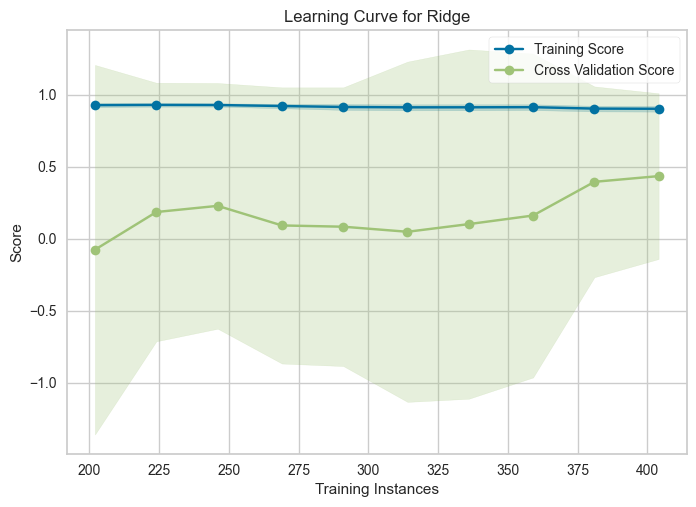

In [13]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show()

c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.449e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

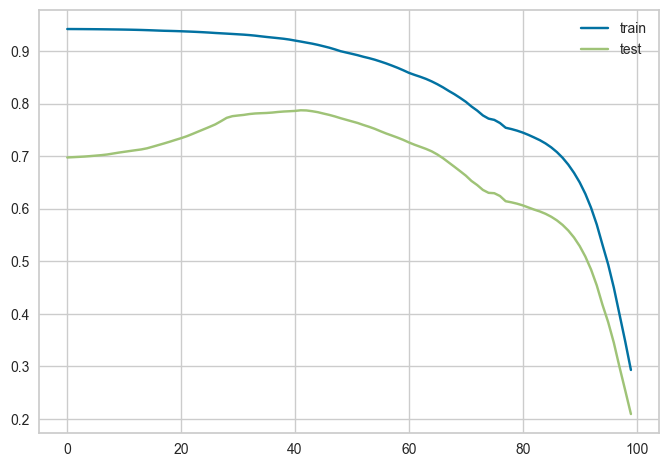

In [14]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
    ridge = Lasso(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [15]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


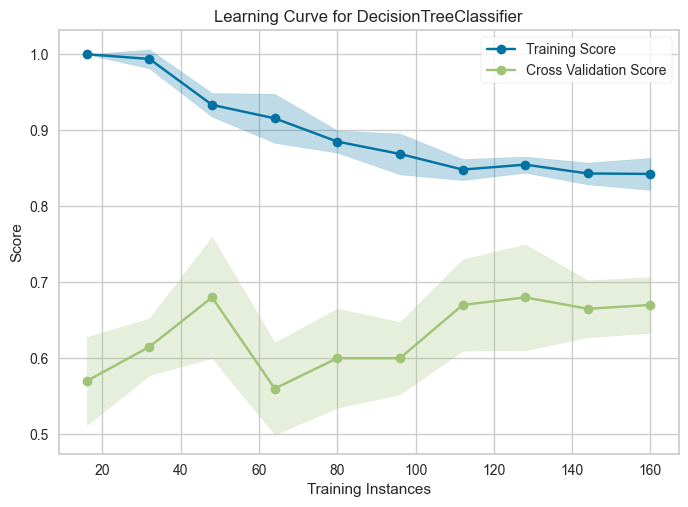

In [18]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


In [20]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons')
data.data.shape

(7129, 5)

In [21]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6092
Test score = 0.5989


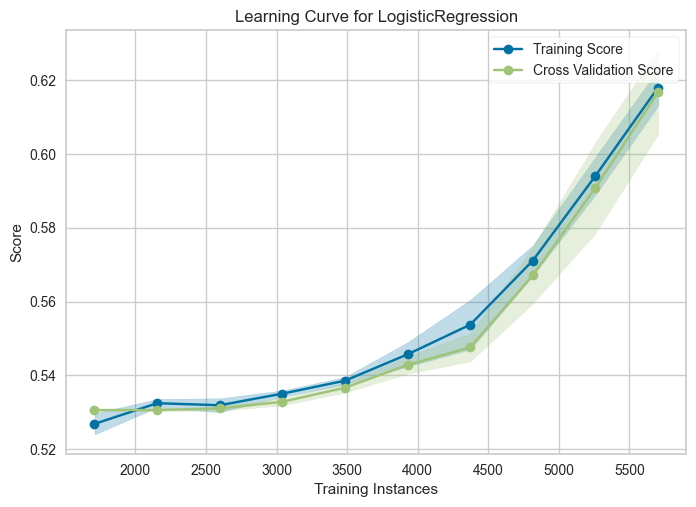

In [23]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [24]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9390
Test score = 0.9390


c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

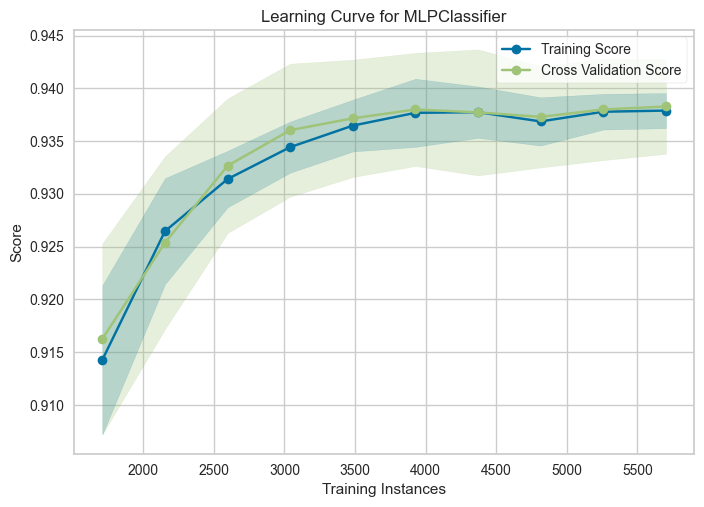

In [25]:
visualizer = LearningCurve(
    MLPClassifier(max_iter=200), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [26]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


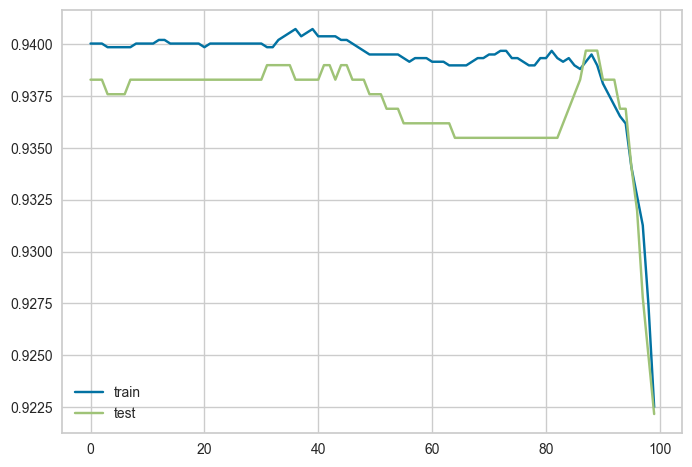

In [27]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
    ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
    trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
    tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

## Задания

### 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [28]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=100,
                           n_informative=30, n_repeated=0,
                           class_sep=1, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8467
Test score: 0.7840


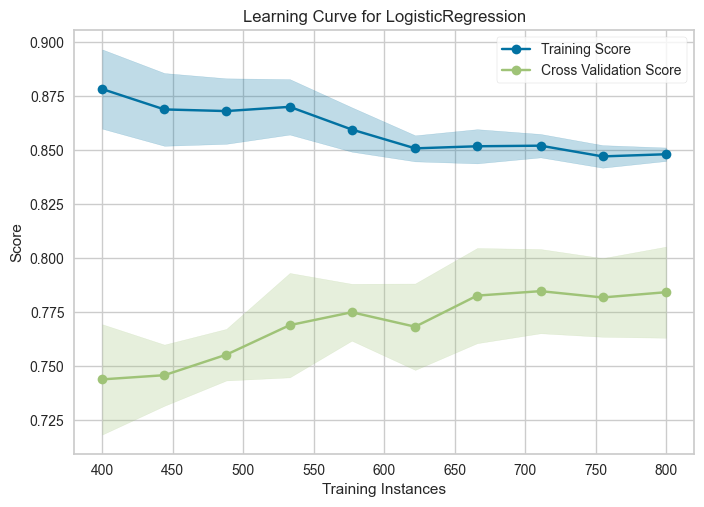

In [30]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(max_iter=1000), train_sizes=np.linspace(0.5, 1.0, 10), scoring='precision'
).fit(X, y).show()

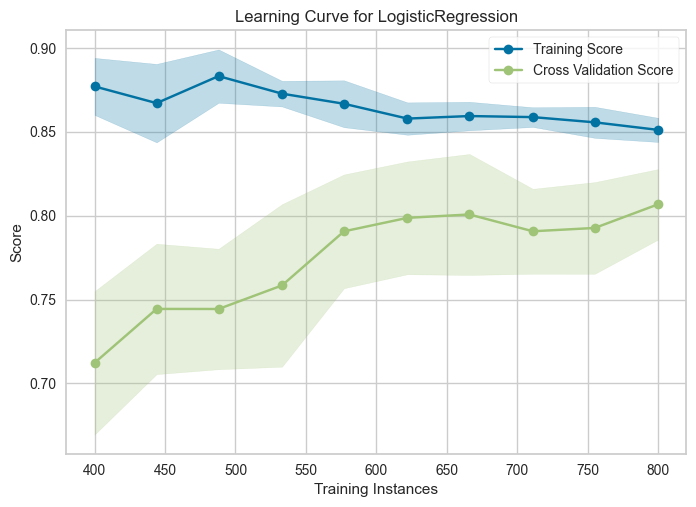

In [31]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(max_iter=1000), train_sizes=np.linspace(0.5, 1.0, 10), scoring='recall'
).fit(X, y).show()

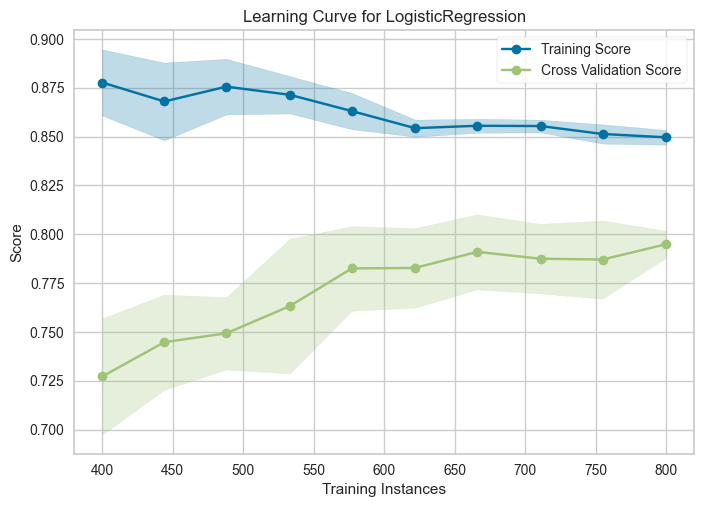

In [32]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(max_iter=1000), train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1'
).fit(X, y).show()

### 2. Повторите диагностику модели регрессии с использованием других видов моделей:
### метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
### метода ближайших соседей (исследуйте влияние количества соседей)
### метода решающих деревьев (гиперпараметры по вашему выбору)

In [33]:
from sklearn.svm import SVC

vm = SVC().fit(X_train, y_train)

print(f"Training score: {vm.score(X_train, y_train):.4f}")
print(f"Test score: {vm.score(X_test, y_test):.4f}")

Training score: 0.9840
Test score: 0.9160


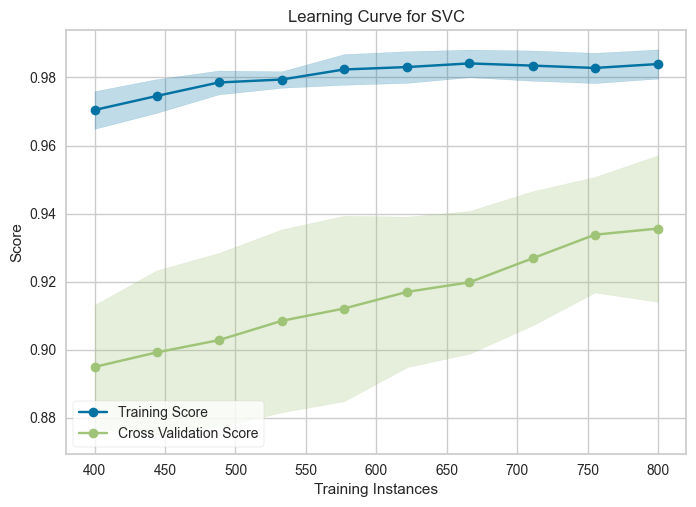

In [34]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    SVC(), train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1'
).fit(X, y).show()

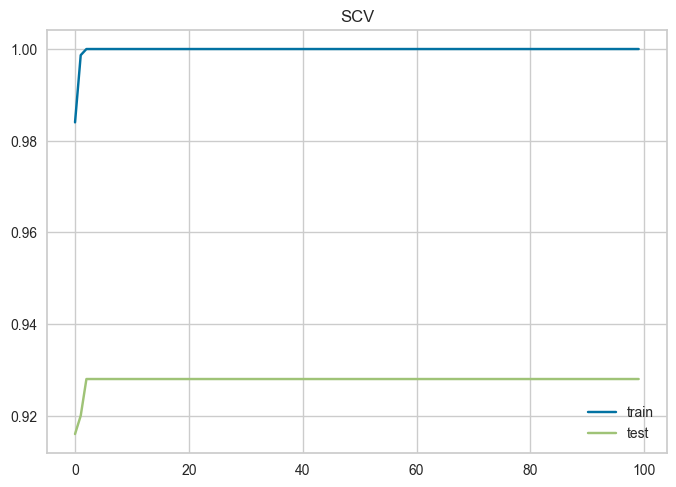

In [35]:
trains = []
tests = []
for i in np.linspace(1, 200, 100):
    # print(i)
    VM = SVC(C=i).fit(X_train, y_train)
    trains.append(VM.score(X_train, y_train))
    tests.append(VM.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('SCV')
plt.legend()
plt.show()

In [36]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier().fit(X_train, y_train)

print(f"Training score: {KNN.score(X_train, y_train):.4f}")
print(f"Test score: {KNN.score(X_test, y_test):.4f}")

Training score: 0.9547
Test score: 0.9240


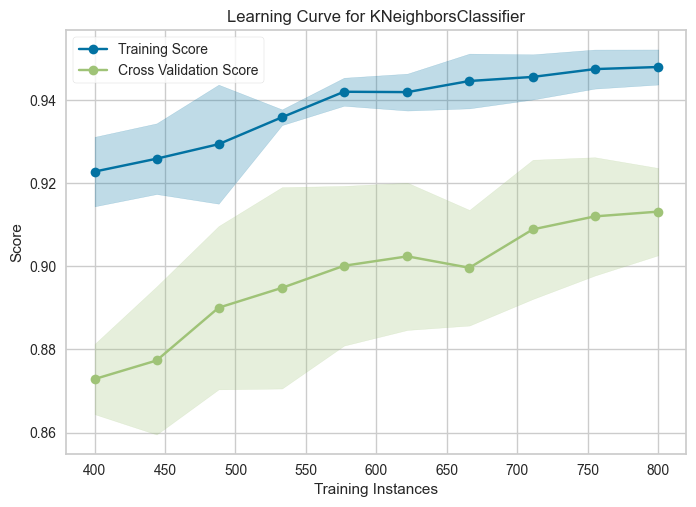

In [37]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
   KNeighborsClassifier(), train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1'
).fit(X, y).show()

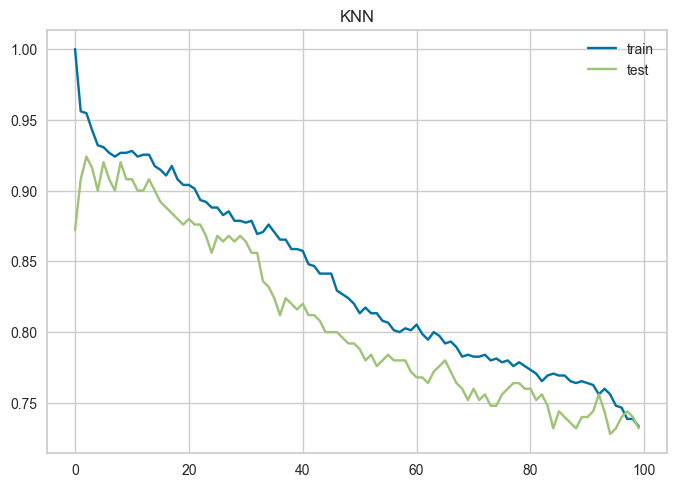

In [38]:
trains = []
tests = []
for i in np.linspace(1, 200, 100):
    KNN = KNeighborsClassifier(n_neighbors=int(i)).fit(X_train, y_train)
    # print(i)
    trains.append(KNN.score(X_train, y_train))
    tests.append(KNN.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('KNN')
plt.legend()
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(X_train, y_train)

print(f"Training score: {DT.score(X_train, y_train):.4f}")
print(f"Test score: {DT.score(X_test, y_test):.4f}")

Training score: 1.0000
Test score: 0.6320


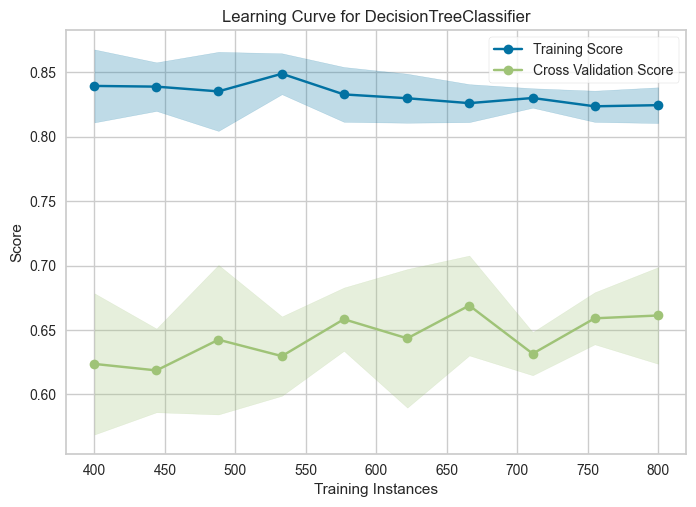

In [40]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
   DecisionTreeClassifier(max_depth=5), train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1'
).fit(X, y).show()

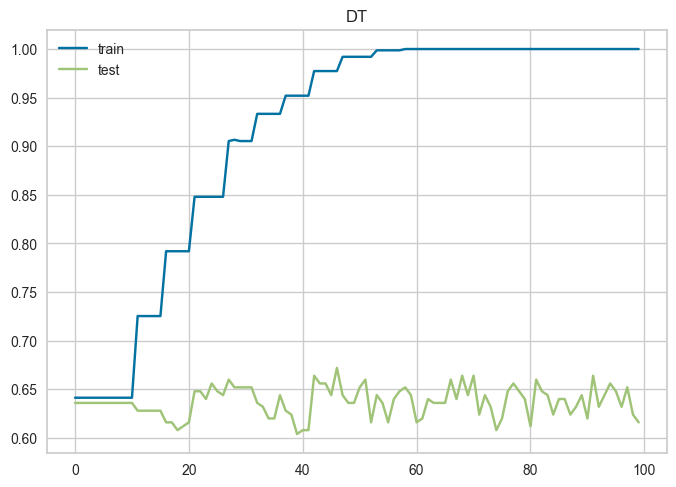

In [41]:
trains = []
tests = []
for i in np.linspace(1, 20, 100):
    DT = DecisionTreeClassifier(max_depth=int(i)).fit(X_train, y_train)
    trains.append(DT.score(X_train, y_train))
    tests.append(DT.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('DT')
plt.legend()
plt.show()

### 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

In [42]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=3)

In [43]:
from sklearn.linear_model import Lasso

Las = Lasso().fit(X_train, y_train)

print(f"Training score: {Las.score(X_train, y_train):.4f}")
print(f"Test score: {Las.score(X_test, y_test):.4f}")

Training score: 0.2571
Test score: 0.2522


c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+03, tolerance: 3.242e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

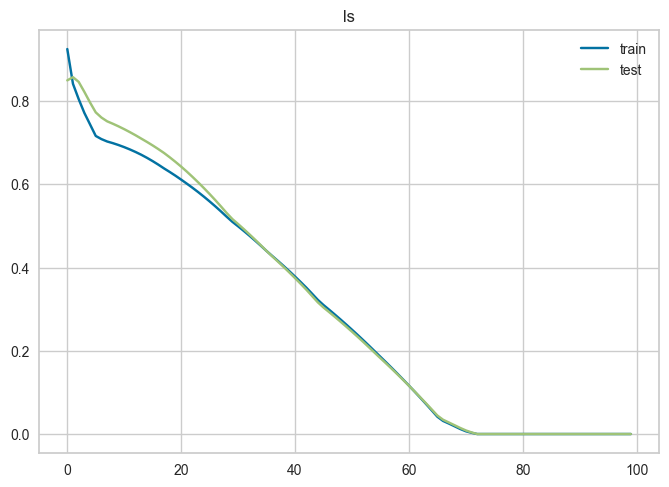

In [44]:
trains = []
tests = []
for i in np.linspace(0, 2, 100):
    ls = Lasso(alpha=i).fit(X_train, y_train)
    trains.append(ls.score(X_train, y_train))
    tests.append(ls.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('ls')
plt.legend()
plt.show()

c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.863e+01, tolerance: 2.272e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+01, tolerance: 2.786e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

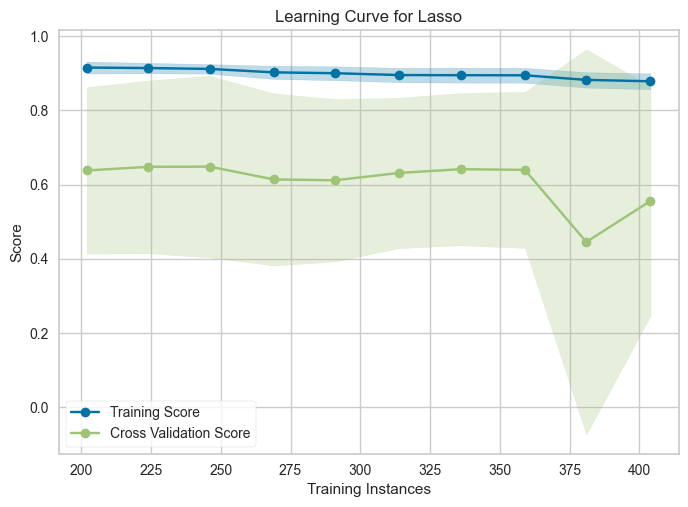

In [45]:
# нормальная
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
  Lasso(alpha=0.01), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

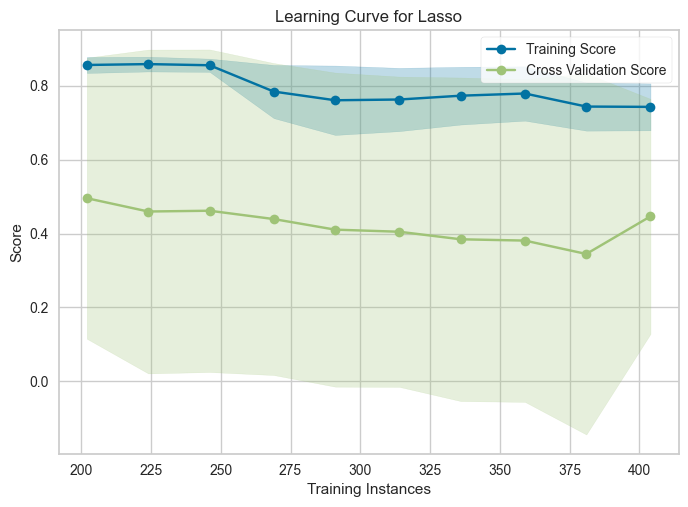

In [46]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
  Lasso(alpha=0.1), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

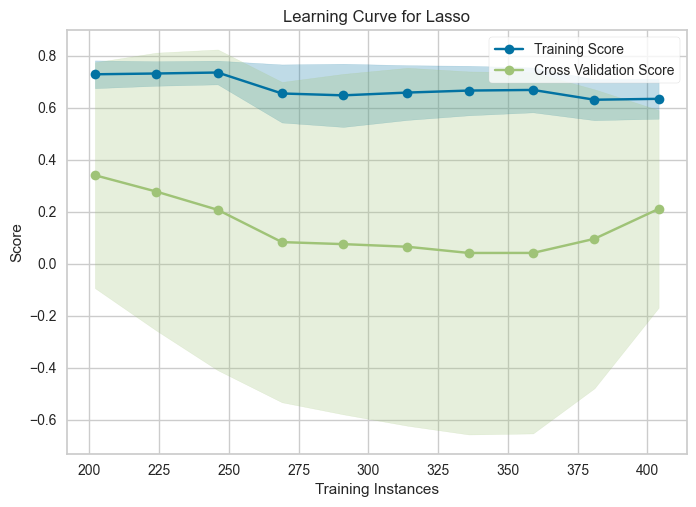

In [47]:
# недообученная
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
  Lasso(alpha=0.4), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

In [48]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': np.linspace(0.01, 2, 30)})

grid.fit(X_train, y_train)

c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+01, tolerance: 2.509e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.749e+01, tolerance: 2.687e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.01      , 0.07862069, 0.14724138, 0.21586207, 0.28448276,
       0.35310345, 0.42172414, 0.49034483, 0.55896552, 0.62758621,
       0.6962069 , 0.76482759, 0.83344828, 0.90206897, 0.97068966,
       1.03931034, 1.10793103, 1.17655172, 1.24517241, 1.3137931 ,
       1.38241379, 1.45103448, 1.51965517, 1.58827586, 1.65689655,
       1.72551724, 1.79413793, 1.86275862, 1.93137931, 2.        ])})

In [49]:
grid.best_params_

{'alpha': 0.01}

### 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

In [50]:
from sklearn.linear_model import ElasticNet

from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.273e+02, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

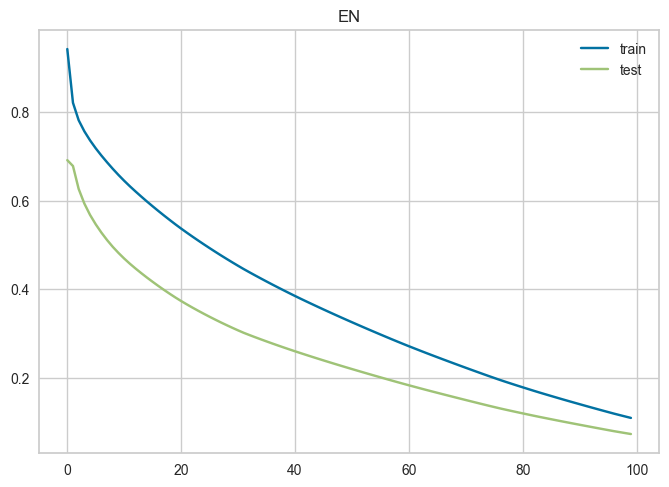

In [51]:
trains = []
tests = []
for i in np.linspace(0, 2, 100):
    EN = ElasticNet(alpha=i).fit(X_train, y_train)
    trains.append(EN.score(X_train, y_train))
    tests.append(EN.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('EN')
plt.legend()
plt.show()

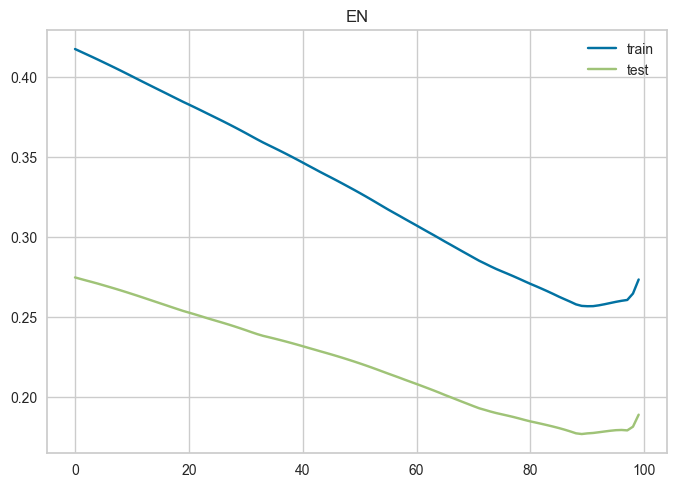

In [52]:
trains = []
tests = []
for i in np.linspace(0.01, 0.99, 100):
    EN = ElasticNet(l1_ratio=i).fit(X_train, y_train)
    trains.append(EN.score(X_train, y_train))
    tests.append(EN.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('EN')
plt.legend()
plt.show()

c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.326e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


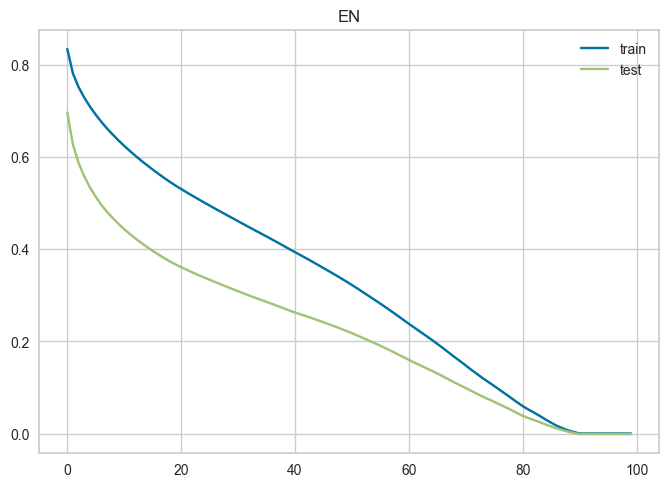

In [53]:
trains = []
tests = []
for i in np.linspace(0.01, 2, 100):
    EN = ElasticNet(alpha=i, l1_ratio=i/2).fit(X_train, y_train)
    trains.append(EN.score(X_train, y_train))
    tests.append(EN.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('EN')
plt.legend()
plt.show()

### 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

In [54]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2).fit(X_train, y_train)

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 1.0000
Test score: 0.7532


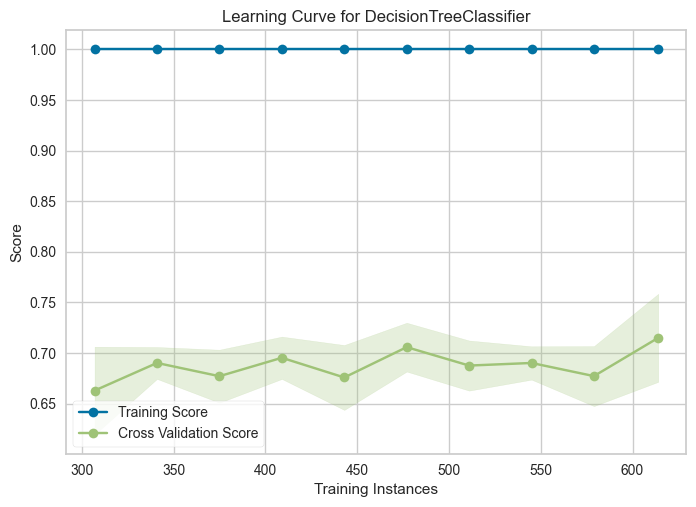

In [57]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
  DecisionTreeClassifier(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

In [58]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 9)})

grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 9)})

In [59]:
grid.best_params_

{'max_depth': 3}

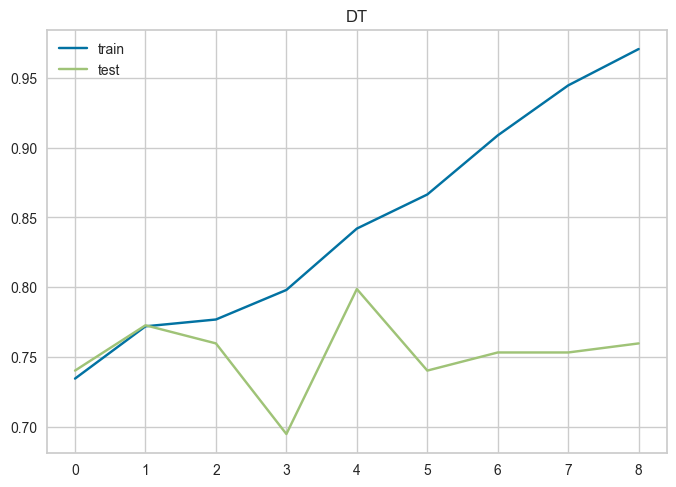

In [60]:
trains = []
tests = []
for i in range(1, 10):
    DT = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    trains.append(DT.score(X_train, y_train))
    tests.append(DT.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('DT')
plt.legend()
plt.show()

In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2,
                               max_depth=5).fit(X_train, y_train)

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.8420
Test score: 0.7987


In [62]:
from sklearn.metrics import f1_score

print(f"Training score: {f1_score(y_train, model.predict(X_train)):.4f}")
print(f"Test score: {f1_score(y_test, model.predict(X_test)):.4f}")

Training score: 0.7467
Test score: 0.6931


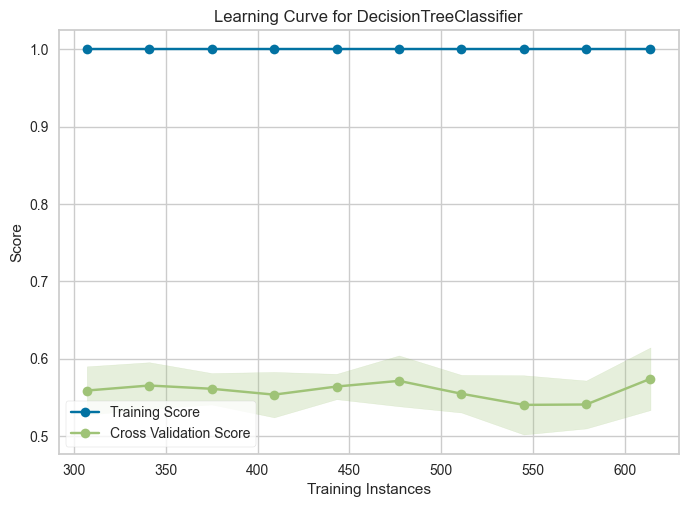

In [63]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
  DecisionTreeClassifier(), train_sizes=np.linspace(0.5, 1.0, 10), scoring='f1'
).fit(X, y).show()

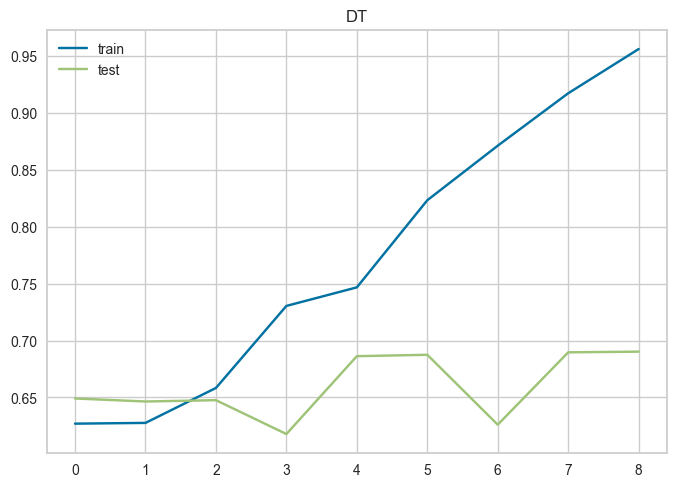

In [64]:
trains = []
tests = []
for i in range(1, 10):
    DT = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    trains.append(f1_score(y_train, DT.predict(X_train)))
    tests.append(f1_score(y_test, DT.predict(X_test)))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('DT')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import f1_score
model = DecisionTreeClassifier(random_state=2,
                               max_depth=5).fit(X_train, y_train)

print(f"Training score: {f1_score(y_train, model.predict(X_train)):.4f}")
print(f"Test score: {f1_score(y_test, model.predict(X_test)):.4f}")

Training score: 0.7467
Test score: 0.6931


### 6. Повторите анализ на других реальных датасетах из репозитория OpenML:
phoneme

banknote-authentication

delta_ailerons

mammography

electricity

mozilla4

kropt

nursery

volcanoes-b3






In [66]:
data = fetch_openml(name='phoneme')
data.data.shape

c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name phoneme exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=1489
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=43973

  warn(warning_msg)


(5404, 5)

In [67]:
X = data.data
X.head()

,V1,V2,V3,V4,V5
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418
1,-0.641265,0.109245,0.292130,-0.916804,0.240223
2,0.870593,-0.459862,0.578159,0.806634,0.835248
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127


In [68]:
y = data.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: category
Categories (2, object): ['1', '2']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [70]:
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7575
Test score: 0.7446


In [71]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier().fit(X_train, y_train)

print(f"Training score: {KNN.score(X_train, y_train):.4f}")
print(f"Test score: {KNN.score(X_test, y_test):.4f}")

Training score: 0.9213
Test score: 0.8727


In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2).fit(X_train, y_train)

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 1.0000
Test score: 0.8608


In [73]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.8678
Test score: 0.8579


c:\Users\sedof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


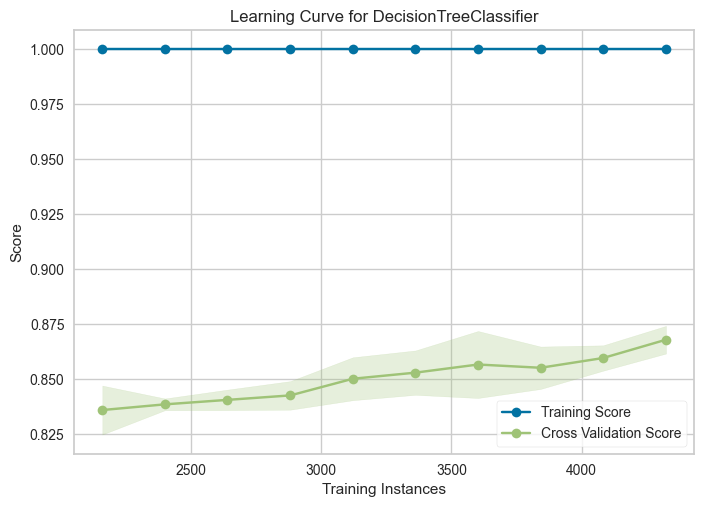

In [74]:
visualizer = LearningCurve(
  DecisionTreeClassifier(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

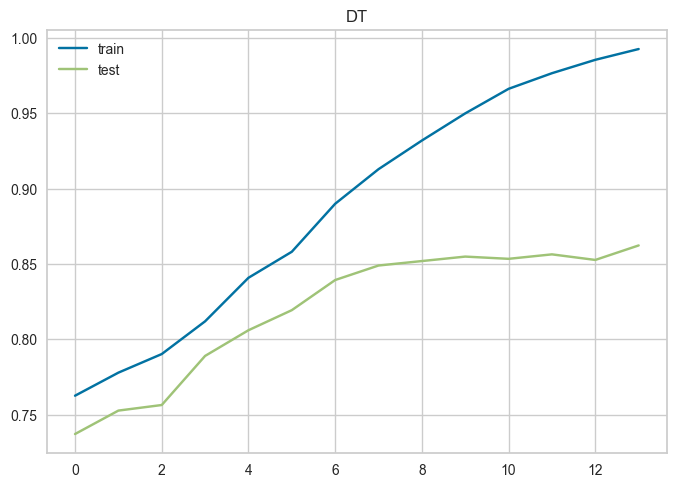

In [75]:
trains = []
tests = []
for i in range(1, 15):
    DT = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    trains.append(DT.score(X_train, y_train))
    tests.append(DT.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.title('DT')
plt.legend()
plt.show()

In [76]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)

print(f"Training score: {model.score(X_train, y_train):.4f}")
print(f"Test score: {model.score(X_test, y_test):.4f}")

Training score: 0.8900
Test score: 0.8386
